In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import DataAnalysis as da

In [3]:
metalTubeVolume = 157.6
tubeOffset = 7.4 # revise as needed
volumeInGlass = lambda x: (3.32/2)**2*np.pi*(x+.64)
volume_func = lambda x: volumeInGlass(x) +  tubeOffset + metalTubeVolume

In [4]:
height_markers = [40.5, 50, 36.5, 12, 15]
volume = [volume_func(x/10) for x in height_markers]
temp = [x+273.15 for x in [23.6, 48.7, 27.7, 1.3, 14.9]]

In [5]:
volume

[205.60120203912822,
 213.82532611954866,
 202.1384129526354,
 180.92882979786694,
 183.52592161273654]

In [6]:
da.weighted_least_squares_linear(volume, temp, np.ones(len(temp)))

([1.1169491319596754, 76.12323206850002],
 [0.0348556719430609, 6.8882086797934114],
 [array([305.76931622, 314.95524447, 301.90155695, 278.21153146,
         281.11235091]),
  array([ 9.01931622, -6.89475553,  1.05155695,  3.76153146, -6.93764909])],
 [192.2715847218414])

<ErrorbarContainer object of 3 artists>

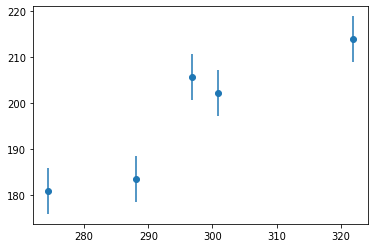

In [7]:
plt.errorbar(temp, volume, fmt="o", yerr= 5)

In [8]:
da.correlation_coefficients(temp, volume)

0.917763978109299

In [9]:
height_markers2 = [37, 46.5, 40.5, 23, 19.5]
volume2 = [volume_func(x/10) for x in height_markers2]
temp2 = [x+273.15 for x in [24, 41.9, 29.7, 6.5, 5.3]]

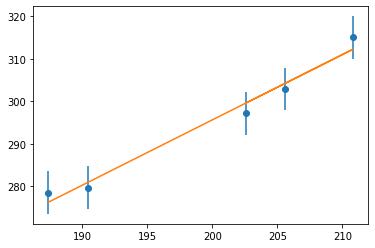

In [19]:
plt.errorbar(volume2,temp2,  fmt="o", yerr= 5)
plt.plot(volume2, y_pred)

In [11]:
da.correlation_coefficients(temp2, volume2)

0.988593612592359

In [20]:
da.weighted_least_squares_linear(volume2, temp2, np.ones(len(temp)))

([1.5413976504068432, -12.675646812740842],
 [0.04988041438398786, 9.954618179878972],
 [array([299.56721984, 312.24386537, 304.23756293, 280.88584747,
         276.21550438]),
  array([ 2.41721984, -2.80613463,  1.38756293,  1.23584747, -2.23449562])],
 [22.16296382621656])

In [24]:
volume2

[202.57126158844702,
 210.79538566886745,
 205.60120203912822,
 190.45149978572218,
 187.42155933504097]

In [26]:
height_markers3 = [44, 42, 39, 36, 32, 28]
volume3 = [volume_func(x/10) for x in height_markers3]
weight = [0, 50, 100, 150, 200, 300]

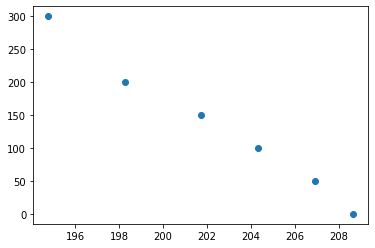

In [27]:
plt.scatter(volume3, weight)

In [28]:
da.correlation_coefficients(volume3, weight)

-0.9948469575220568

In [31]:
da.weighted_least_squares_linear(volume3, weight, np.ones(len(volume3)))

([-20.415427402788257, 4265.9666215499],
 [0.08496573200572331, 17.20420088406292],
 [array([  6.67267809,  42.01983769,  95.0405771 , 148.0613165 ,
         218.75563571, 289.44995491]),
  array([  6.67267809,  -7.98016231,  -4.9594229 ,  -1.9386835 ,
          18.75563571, -10.55004509])],
 [599.6393146979193])

In [33]:
height_markers4 = [69, 67, 65, 62, 59, 54]
volume4 = [volume_func(x/10) for x in height_markers4]
weight = [0, 50, 100, 150, 200, 300]

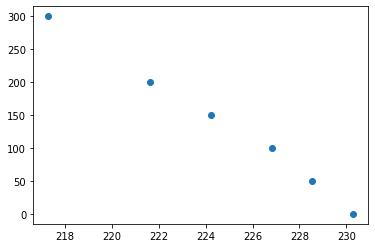

In [35]:
plt.scatter(volume4, weight)

In [36]:
da.correlation_coefficients(volume4, weight)

-0.9975280005098816

In [4]:
1/np.mean([26.19, 28.28, 31.2, 28.38, 33.05, 32.43])

0.03342059822870829

In [6]:
1/np.mean([8.31,
9.18,
11.83,
10.05,
9.84,
11.66,
10.55,
10.82])

0.09727626459143968

In [8]:
9/48.79

0.18446402951424473